In [1]:
import numpy as np
import sys
import cv2
from matplotlib import pyplot as plt
import math
from math import sin,cos,radians

#Move to parent folder
sys.path.insert(0, '../../croprows-cli/src/')

In [2]:
def label(image, text):
    #Labels the given image with the given text
    return cv2.putText(image, text, (0, 50), cv2.FONT_HERSHEY_SIMPLEX, 2, 255)

In [3]:
def contrast_stretch(im):
    #Performs a simple contrast stretch of the given image, from 5-95%.
    in_min = np.percentile(im, 5)
    in_max = np.percentile(im, 95)

    out_min = 0.0
    out_max = 255.0

    out = im - in_min
    out *= ((out_min - out_max) / (in_min - in_max))
    out += in_min

    return out

In [4]:
def disp_multiple(im1=None, im2=None, im3=None, im4=None):
    """
    Combines four images for display.
    """
    height, width = im1.shape

    combined = np.zeros((2 * height, 2 * width, 3), dtype=np.uint8)

    combined[0:height, 0:width, :] = cv2.cvtColor(im1, cv2.COLOR_GRAY2RGB)
    combined[height:, 0:width, :] = cv2.cvtColor(im2, cv2.COLOR_GRAY2RGB)
    combined[0:height, width:, :] = cv2.cvtColor(im3, cv2.COLOR_GRAY2RGB)
    combined[height:, width:, :] = cv2.cvtColor(im4, cv2.COLOR_GRAY2RGB)

    return combined

TypeError: Image data can not convert to float

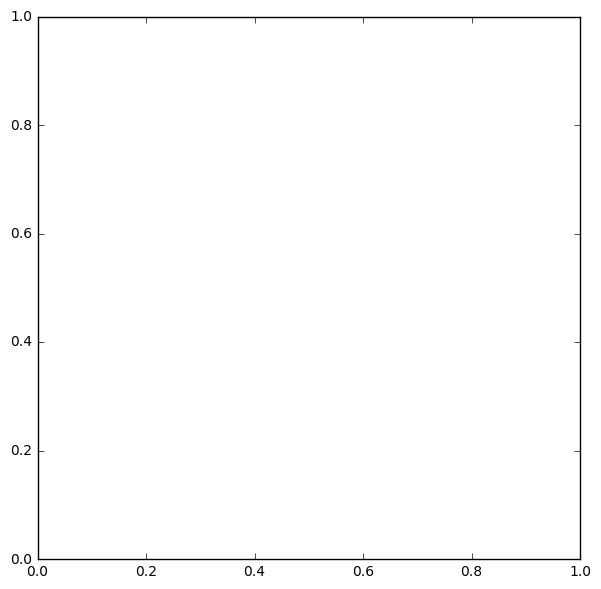

In [5]:
img = cv2.imread("../orthomosaics/results/testfile3/mosaic_5_5_1077px_25_tiles/mosaic-cl_3-rw_2.jpg")
plt.figure(figsize=(7, 7))
plt.imshow(img)
plt.show()

In [ ]:
# Get the individual colour components of the image
b, g, r = cv2.split(img)

plt.figure(figsize=(7, 7))
plt.imshow(r)
plt.show()

plt.figure(figsize=(7, 7))
plt.imshow(g)
plt.show()

plt.figure(figsize=(7, 7))
plt.imshow(b)
plt.show()

In [ ]:
# Calculate the NDVI
# Bottom of fraction
bottom = (r.astype(float) + b.astype(float))
bottom[bottom == 0] = 0.01  # Make sure we don't divide by zero!

ndvi = (r.astype(float) - b) / bottom
ndvi = contrast_stretch(ndvi)
ndvi = ndvi.astype(np.uint8)

# Do the labelling
label(b, 'Blue')
label(g, 'Green')
label(r, 'NIR')
label(ndvi, 'NDVI')

# Combine ready for display
combined = disp_multiple(b, g, r, ndvi)

In [ ]:
plt.figure(figsize=(7, 7))
plt.imshow(combined)
plt.show()

In [ ]:
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

# # equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

# # convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

plt.figure(figsize=(7, 7))
plt.imshow(img_output)
plt.show()

In [ ]:
gamma=0.4
invGamma = 1.0 / gamma
table = np.array([((i / 255.0) ** invGamma) * 255
for i in np.arange(0, 256)]).astype("uint8")
lut = cv2.LUT(img, table)
    
plt.figure(figsize=(7, 7))
plt.imshow(lut)
plt.show()

In [ ]:
def hisEqulColor(img):
    ycrcb=cv2.cvtColor(img,cv2.COLOR_BGR2YCR_CB)
    channels=cv2.split(ycrcb)
    print(len(channels))
    cv2.equalizeHist(channels[0],channels[0])
    cv2.merge(channels,ycrcb)
    cv2.cvtColor(ycrcb,cv2.COLOR_YCR_CB2BGR,img)
    return img

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

plt.figure(figsize=(7, 7))
plt.imshow(hsv)
plt.show()

his = hisEqulColor(img)

plt.figure(figsize=(7, 7))
plt.imshow(his)
plt.show()


his2 = hisEqulColor(lut)

plt.figure(figsize=(7, 7))
plt.imshow(his2)
plt.show()